# Import packages and dataset

### Predict how capable each applicant is of repaying a loan

Columns description: https://docs.google.com/spreadsheets/d/1Ano-dLFAqBLJk2MCrVlClpj3QnOMZGBtQDbqeg12XKU/edit?usp=sharing

Some important varibales: https://docs.google.com/spreadsheets/d/195u9E27V5u3yegTFHIAG0YeMPytgPSqvC8gICF-soHg/edit?usp=sharing

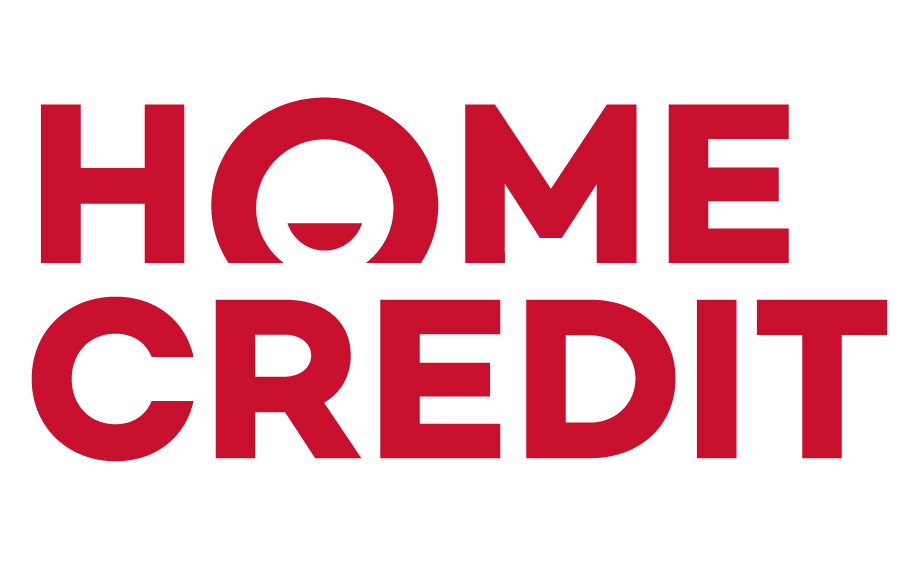

In [15]:
from IPython.display import Image

Image(filename='datasets/Experian/Home-Credit-logo.jpg')

In [5]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
pwd

'C:\\Users\\minhv\\Honor Thesis'

In [12]:
cd ..

C:\Users\minhv


In [40]:
train_dataset = pd.read_csv('datasets/Experian/application_train.csv')

print('Train data shape: ', train_dataset.shape)

train_dataset.head()

Train data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Understand features

### AMT_CREDIT

In [41]:
train_dataset.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

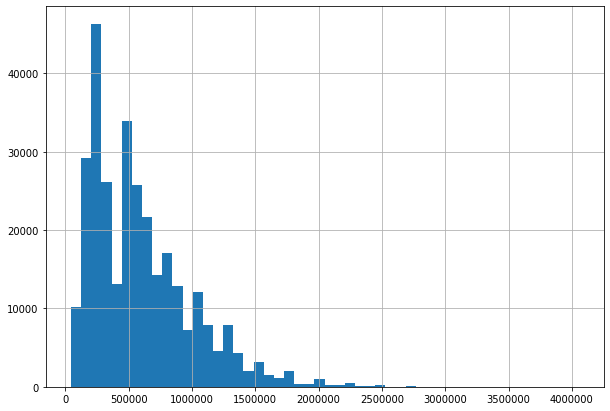

In [42]:
train_dataset.AMT_CREDIT.hist(bins=50, figsize=(10,7))
plt.show()

In [43]:
threshold = train_dataset['AMT_CREDIT'].quantile(0.999)
print(threshold) # prints the 99.9 percentile value (or the median)

2517300.0


In [44]:
outlier_count = sum(map(lambda i: i > threshold, train_dataset['AMT_CREDIT'])) 
print(outlier_count)

134


In [45]:
# Capping loan size at 99.9 percent quantile
# Replaces all those values in the 'AMT_CREDIT' variable, which are greater than the threshold, with the 99.9 percent quantile value
train_dataset['AMT_CREDIT'] = np.where(train_dataset['AMT_CREDIT'] > threshold, threshold, train_dataset['AMT_CREDIT'])

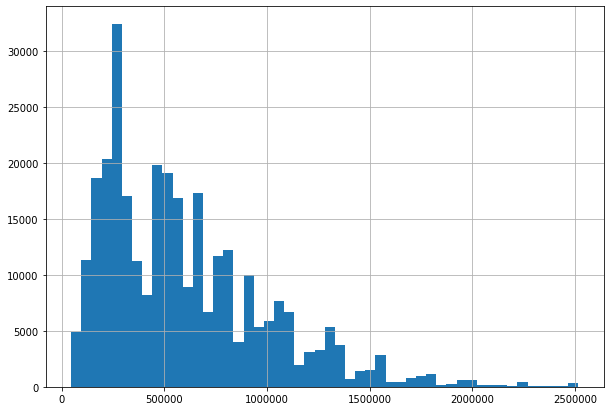

In [46]:
train_dataset.AMT_CREDIT.hist(bins=50, figsize=(10,7))
plt.show()

### AMT_INCOME_TOTAL

In [47]:
train_dataset.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [48]:
# detect outliers with IQR
# anything above (Q3+1.5*IQR) is outliers
Q1 = train_dataset['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = train_dataset['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5*IQR
print(threshold)

outlier_count = sum(map(lambda i: i > threshold, train_dataset['AMT_INCOME_TOTAL'])) 
print("Number of instance with a value higher than threshold ({0}): {1}".format(threshold, outlier_count))

337500.0
Number of instance with a value higher than threshold (337500.0): 14035


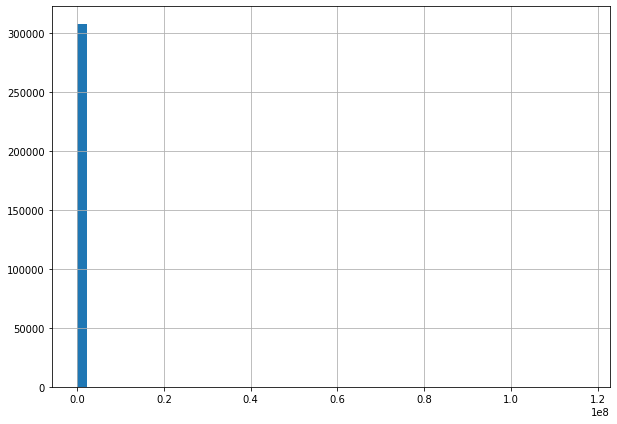

In [49]:
train_dataset.AMT_INCOME_TOTAL.hist(bins=50, figsize=(10,7))
plt.show()

In [50]:
threshold = train_dataset['AMT_INCOME_TOTAL'].quantile(0.999)
print(threshold)

outlier_count = sum(map(lambda i: i > threshold, train_dataset['AMT_INCOME_TOTAL'])) 
print("Number of instance with a value higher than threshold ({0}): {1}".format(threshold, outlier_count))

900000.0
Number of instance with a value higher than threshold (900000.0): 278


In [51]:
# Capping income at 99.9 percent quantile
# Replaces all those values in the 'AMT_INCOME_TOTAL' variable, which are greater than the threshold, with the 99.9 percent quantile value
train_dataset['AMT_INCOME_TOTAL'] = np.where(train_dataset['AMT_INCOME_TOTAL'] > threshold, threshold, train_dataset['AMT_INCOME_TOTAL'])

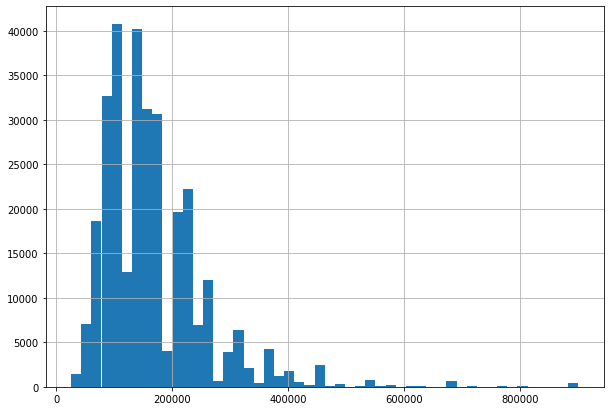

In [52]:
train_dataset.AMT_INCOME_TOTAL.hist(bins=50, figsize=(10,7))
plt.show()

### TARGET

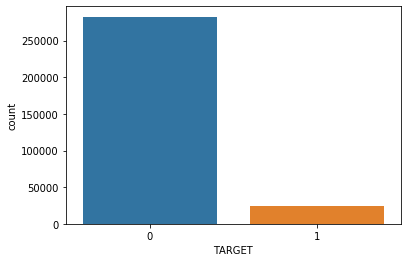

In [53]:
sns.countplot(x="TARGET", data=train_dataset)

In [57]:
# row in which 'NAME_CONTRACT_TYPE' is 'Cash loans' and Target == 0
series_index = train_dataset.apply(lambda x : True if x['NAME_CONTRACT_TYPE'] == "Cash loans"
                                                    and x['TARGET'] == 0 else False, axis = 1) 
  
# Count number of True in the series 
cash_0 = len(series_index[series_index == True].index) 
  
print('Number of Rows in dataframe in whiseries_indexch NAME_CONTRACT_TYPE is Cash loans and Target == 0:', cash_0 ) 

Number of Rows in dataframe in which NAME_CONTRACT_TYPE is Cash loans and Target == 0: 255011


In [59]:
# row in which 'NAME_CONTRACT_TYPE' is 'Revolving loans' and Target == 0
series_index = train_dataset.apply(lambda x : True if x['NAME_CONTRACT_TYPE'] == "Revolving loans"
                                                    and x['TARGET'] == 0 else False, axis = 1) 
  
# Count number of True in the series 
revolving_0 = len(series_index[series_index == True].index) 
  
print('Number of Rows in dataframe in which NAME_CONTRACT_TYPE is Revolving loans and Target == 0:', revolving_0 ) 

Number of Rows in dataframe in whiseries_indexch NAME_CONTRACT_TYPE is Revolving loans and Target == 0: 27675


In [60]:
# row in which 'NAME_CONTRACT_TYPE' is 'Revolving loans' and Target == 1
series_index = train_dataset.apply(lambda x : True if x['NAME_CONTRACT_TYPE'] == "Revolving loans"
                                                    and x['TARGET'] == 1 else False, axis = 1) 
  
# Count number of True in the series 
revolving_1 = len(series_index[series_index == True].index) 
  
print('Number of Rows in dataframe in which NAME_CONTRACT_TYPE is Revolving loans and Target == 0:', revolving_1 ) 

Number of Rows in dataframe in whiseries_indexch NAME_CONTRACT_TYPE is Revolving loans and Target == 0: 1604


In [61]:
cash_1 = 307511 - cash_0 - revolving_0 - revolving_1 
print('Number of Rows in dataframe in which NAME_CONTRACT_TYPE is Cash loans and Target == 1 is', cash_1)

Number of Rows in dataframe in which NAME_CONTRACT_TYPE is Cash loans and Target == 1 is 23221


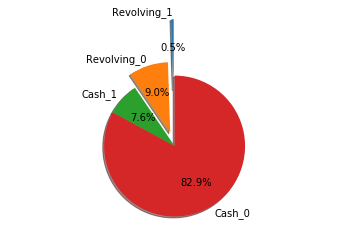

In [65]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Revolving_1', 'Revolving_0', 'Cash_1', 'Cash_0'
sizes = [revolving_1, revolving_0, cash_1, cash_0]
explode = (0.8, 0.2, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

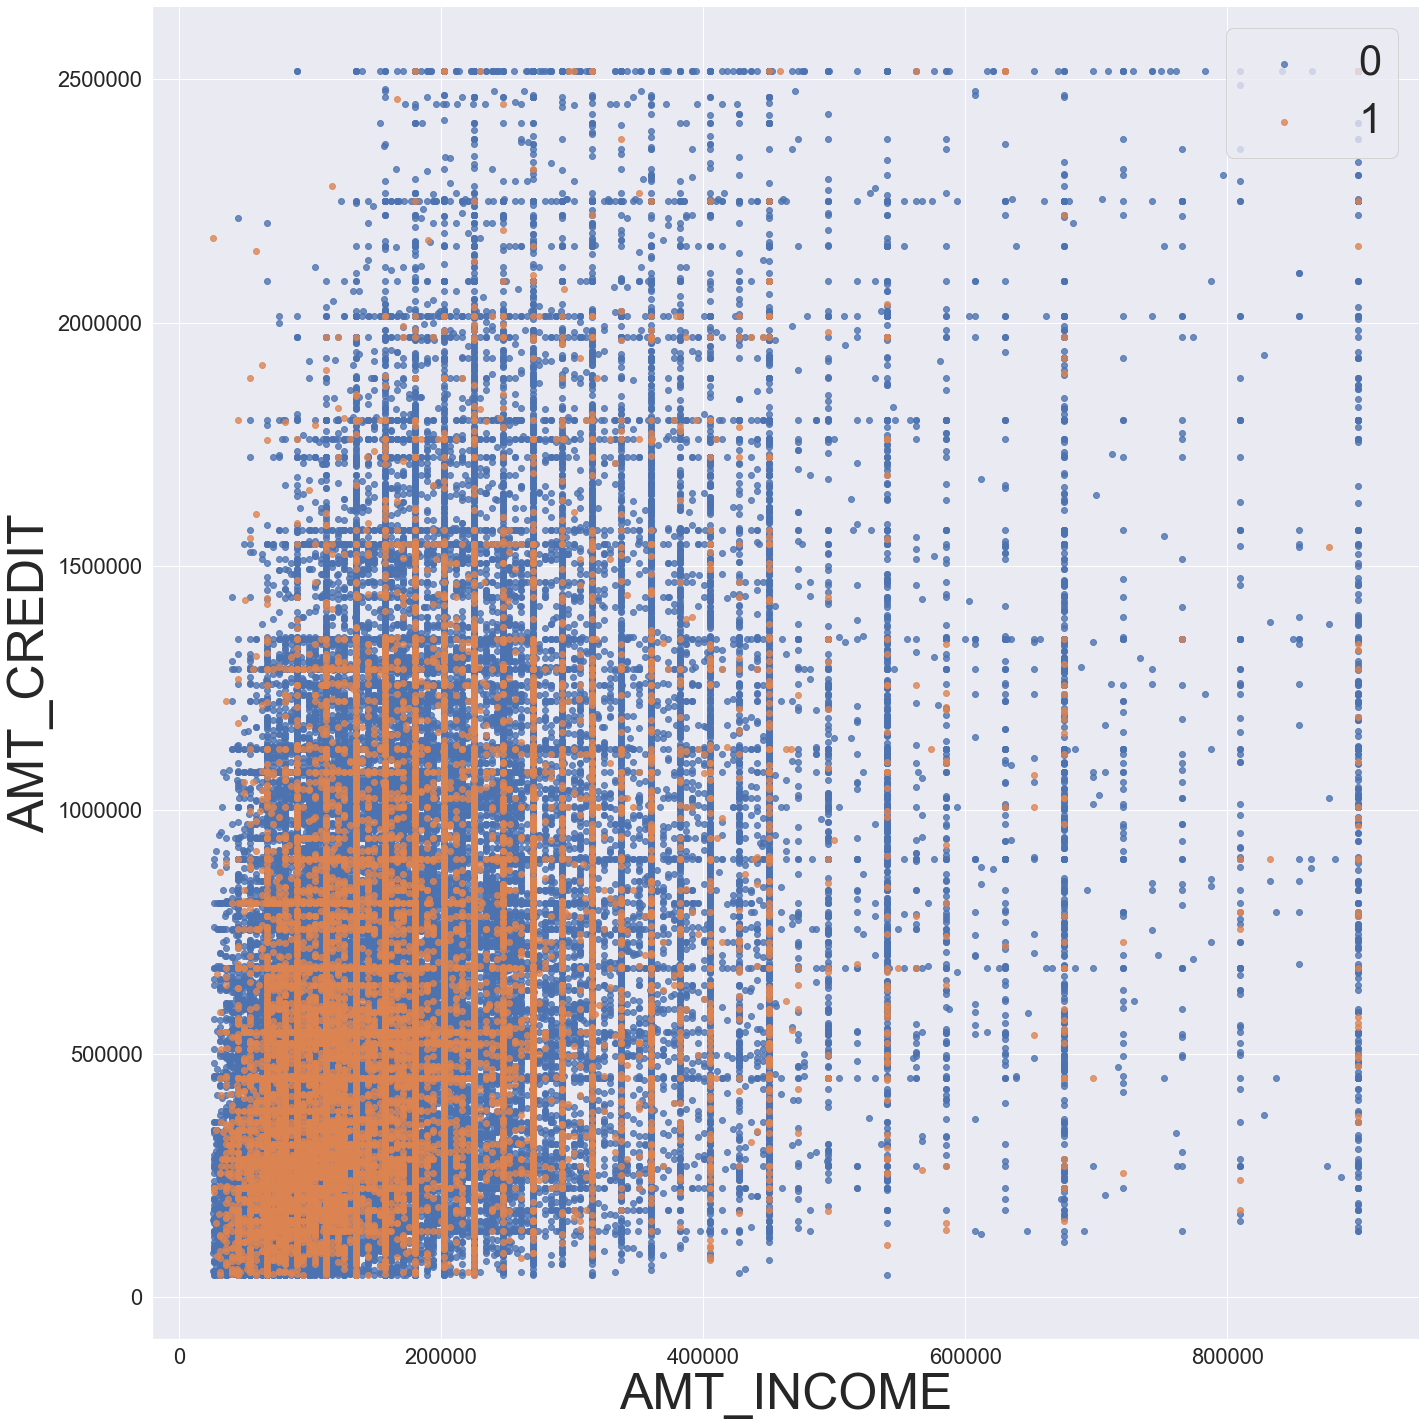

In [66]:
sns.set(font_scale = 2)

ax = sns.lmplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", data=train_dataset, fit_reg=False, hue='TARGET', height=20, legend=False)
plt.legend(loc='upper right', fontsize = 'xx-large')

ax.set_xlabels("AMT_INCOME",fontsize=50)
ax.set_ylabels("AMT_CREDIT",fontsize=50)

plt.show()